In [1]:
import pandas as pd
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('BA5.csv').drop(['True Vertical Depth'], axis = 1)
data.head()

,DateTime,Hole Depth,Bit Depth,MudWatcher Temperature (Degrees F),MudAid Temperature (Degrees F),ES Meter Temperature (Degrees F),Mud Density,Mud Watcher Density (lb/gal),MudWatcher Viscosity,ES Meter Voltage,...,Hook Load,Standpipe Pressure,Rate Of Penetration,Rotary RPM,Rotary Torque,Azimuth,Inclination,In Slip,Differential Pressure,Rate Of Penetration.1
0,11/20/2020 0:51:10,106.0,8.9,0.0,134.6,138.5,8.7,5.17,0.0,90.35,...,57.0,146.25,0.0,0.0,0.226,16.51,1.0,0,42.89,0.0
1,11/20/2020 0:51:20,106.0,100.0,0.0,134.6,138.5,8.7,5.17,0.0,90.35,...,57.0,147.50,0.0,0.0,0.226,16.51,1.0,0,48.28,0.0
2,11/20/2020 0:51:30,106.0,100.0,0.0,134.6,138.5,8.7,5.17,0.0,90.35,...,57.1,152.50,0.0,0.0,0.226,16.51,1.0,0,59.68,0.0
3,11/20/2020 0:51:40,106.0,100.0,0.0,134.6,138.5,8.7,5.17,0.0,90.35,...,57.0,170.00,0.0,0.0,0.226,16.51,1.0,0,69.43,0.0
4,11/20/2020 0:51:50,106.0,100.0,0.0,134.6,138.5,8.7,5.17,0.0,90.35,...,57.1,168.75,0.0,0.0,0.226,16.51,1.0,0,74.93,0.0


In [3]:
len(data.columns)

36

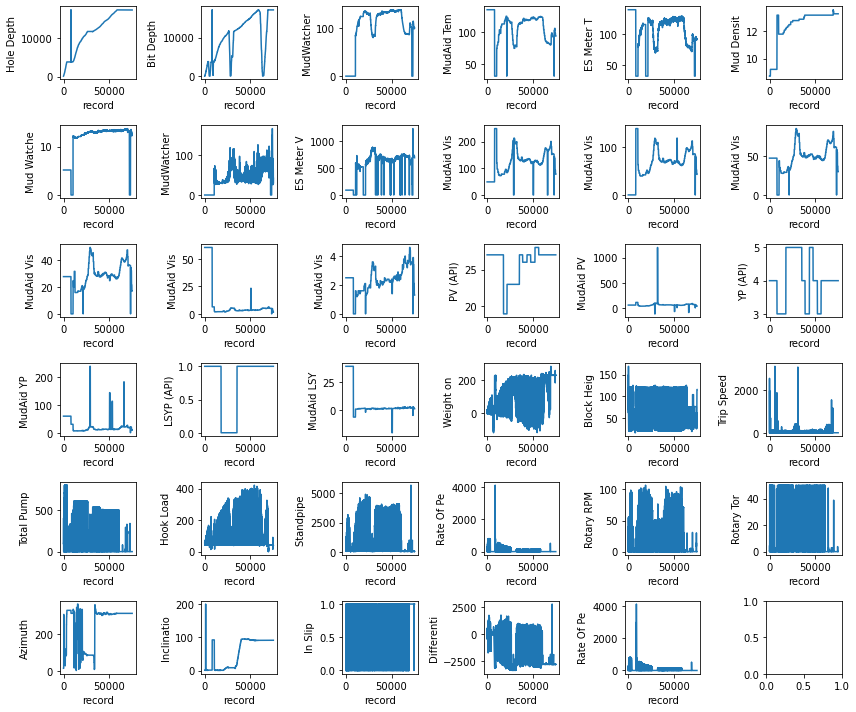

In [32]:
fig, ax = plt.subplots(6,6, figsize = (12,10))

for i in range(len(data.columns[1:])):
    # print(36%i)
    # print(int(36/(i+6)))
    ax[ int(i/6), i % 6].plot(data[data.columns[i + 1]])
    # ax[ int(i/6), i % 6].ticklabel_format(style = 'scientific')
    ax[ int(i/6), i % 6].set_xlabel('record', )
    ax[ int(i/6), i % 6].set_ylabel(data.columns[i + 1][:10] , )
plt.tight_layout()

# visualizing 2D-combinations

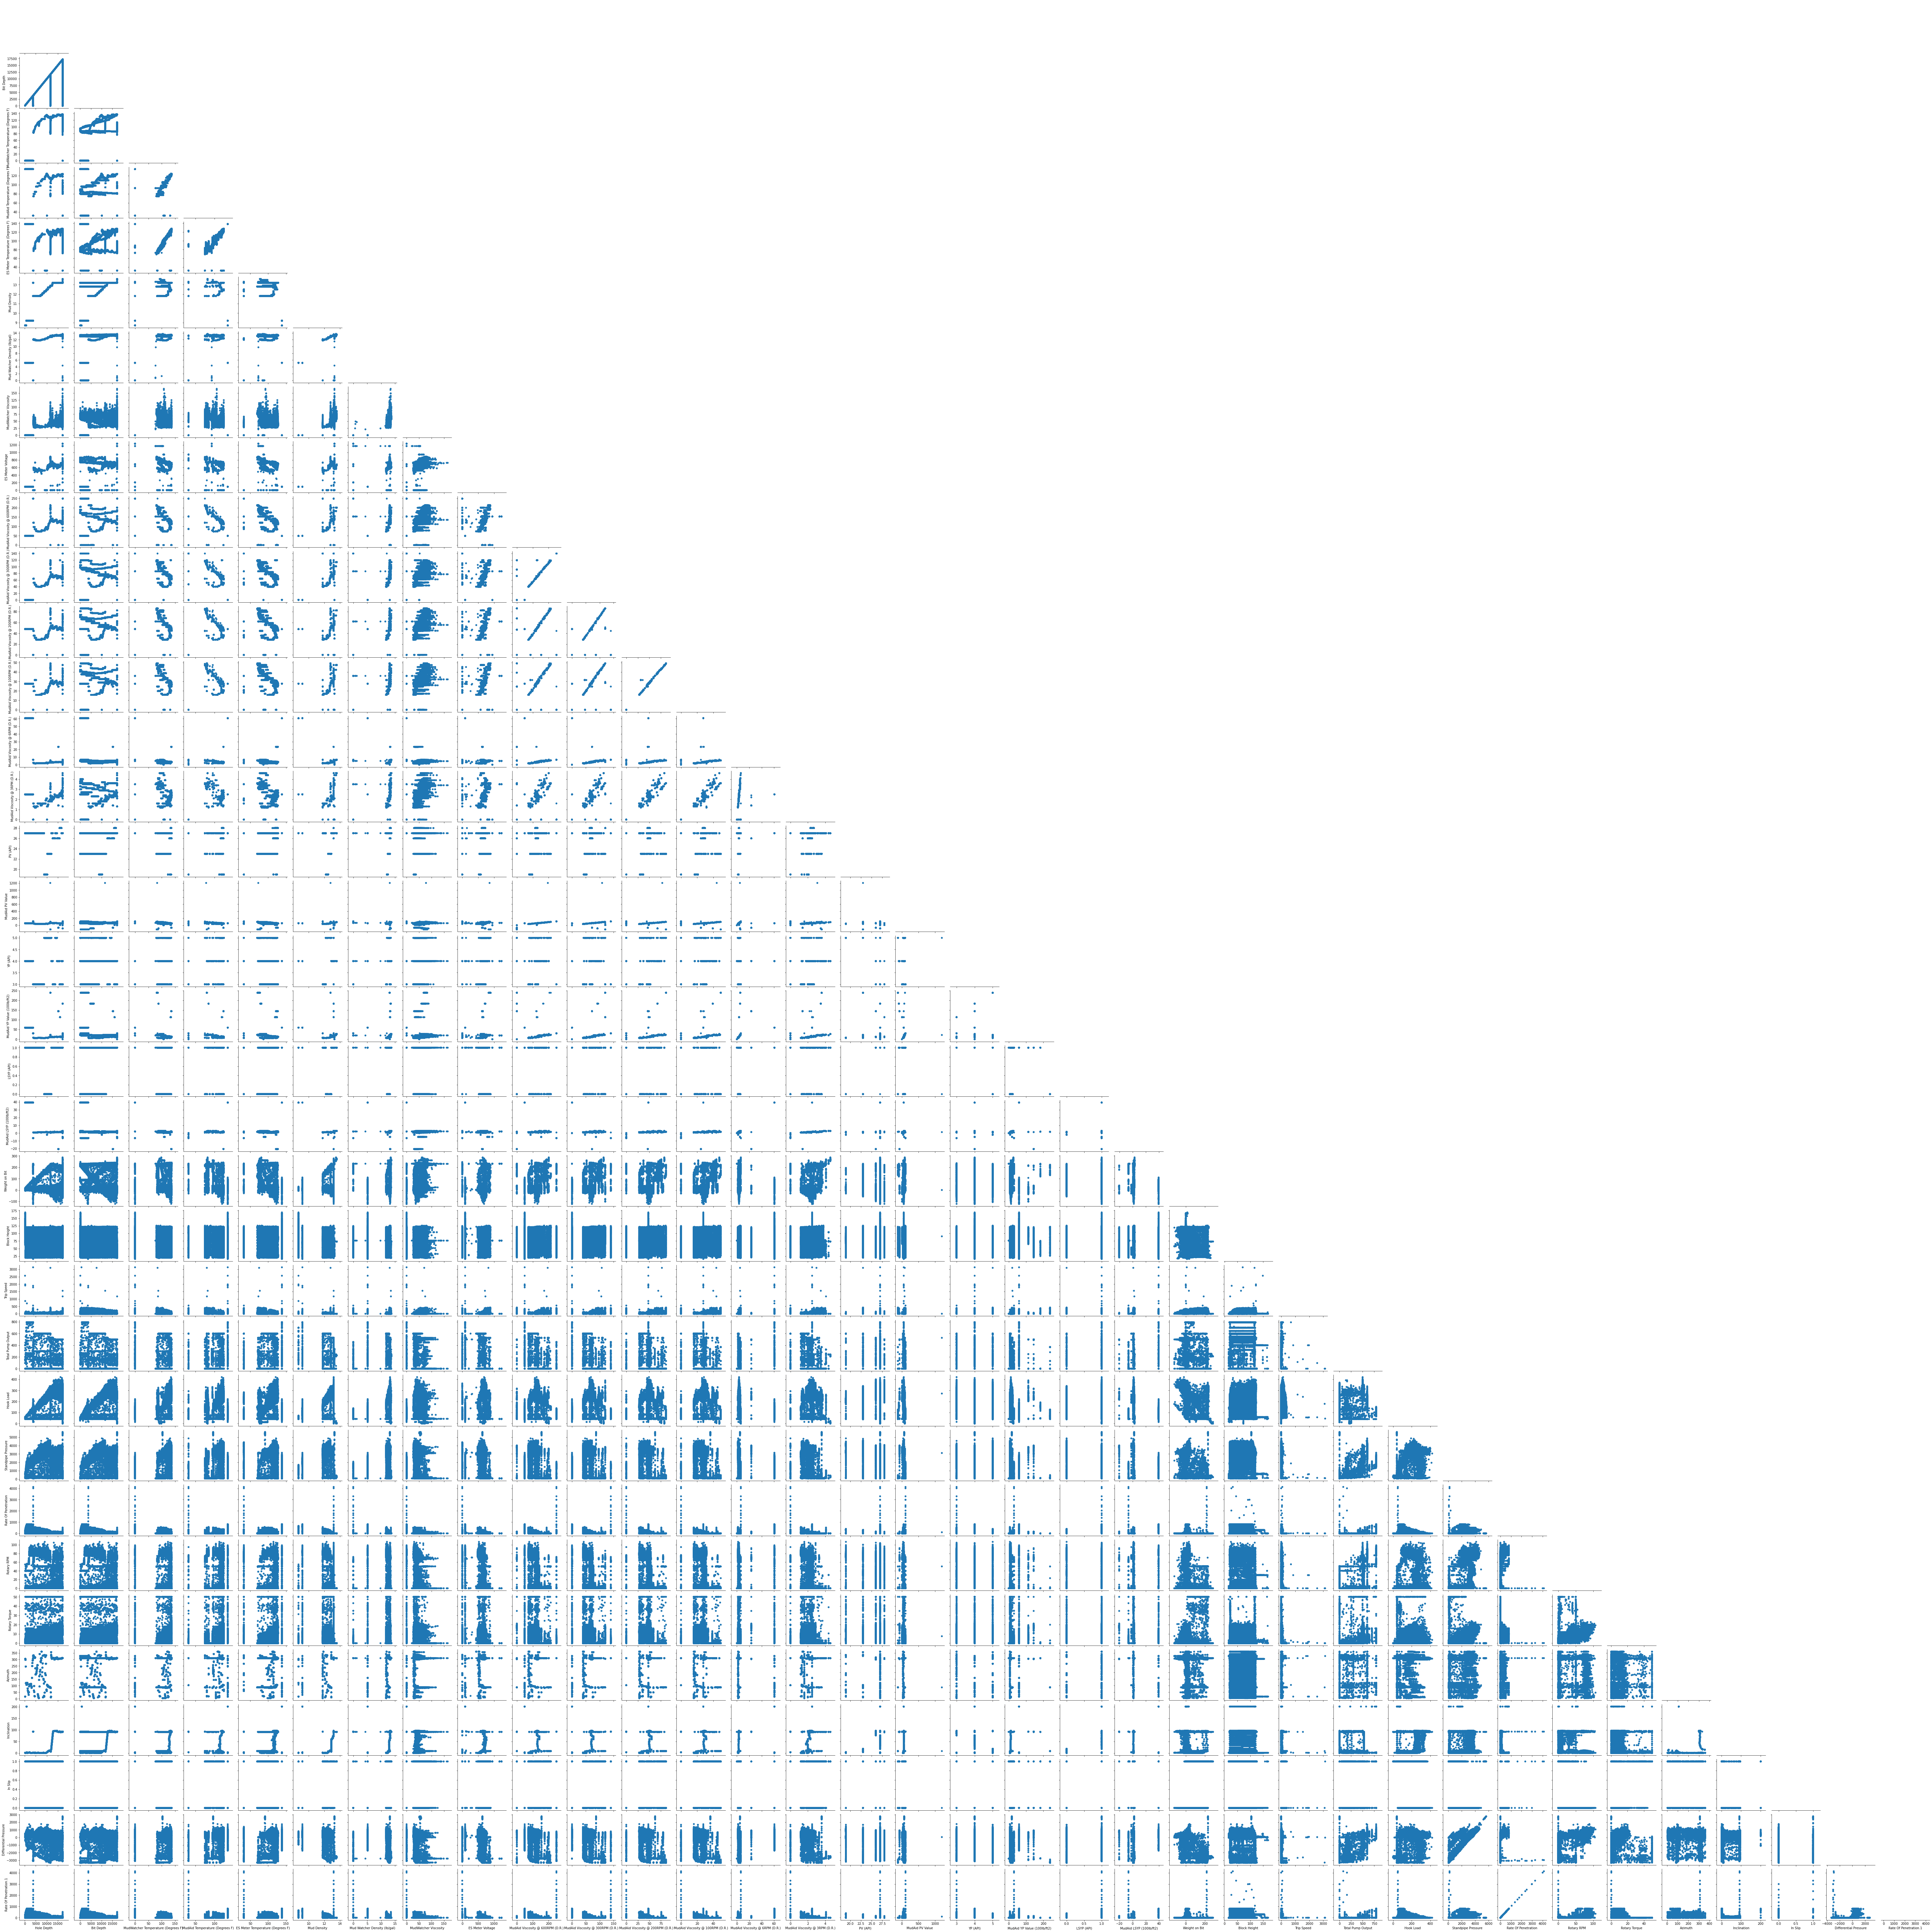

In [33]:
import seaborn as sns


sns.pairplot(data[data.columns[1:]], plot_kws=dict(edgecolor="none"), diag_kind="kde",
    diag_kws={"linewidth": 0, "shade": False}, corner = True)

# showing some 3D graphs (randomly)

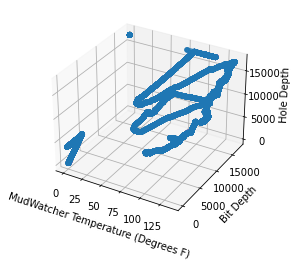

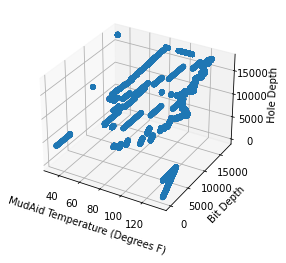

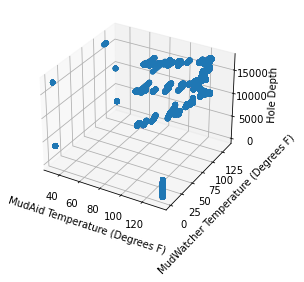

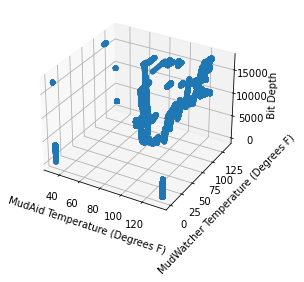

In [41]:
def rotate(angle):
    ax.view_init(azim=angle)
from matplotlib import animation    
    

for i in range(4):
    for j in range(i):
        for k in range(j):
            fig = plt.figure()
            ax = plt.axes(projection='3d')

            X = data[data.columns[i+1]]
            Y = data[data.columns[j+1]]
            Z = data[data.columns[k+1]]
            
            ax.scatter3D(X, Y, Z);
            ax.set_xlabel(data.columns[i+1])
            ax.set_ylabel(data.columns[j+1])
            ax.set_zlabel(data.columns[k+1])
            plt.show()
            rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362*2,10),interval=200)
            rot_animation.save('3DPLOTS_rotation/'+ data.columns[i+1].replace('/', '.') + 'vs' + 
                                               data.columns[j+1].replace('/', '.') + 'vs' + 
                                               data.columns[k+1].replace('/', '.') +' rotation.gif', dpi=200, writer='imagemagick')